# GridSearchCV results analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

path_prefix = "./gridsearch-results"

### Loading dataframe

In [2]:
def load_and_prune_dataframe(path):
    df = pd.read_csv(path)
    df['mean_test_mean_absolute_error'] = (-1)*df['mean_test_neg_mean_absolute_error']
    df['mean_train_mean_absolute_error'] = (-1)*df['mean_train_neg_mean_absolute_error']
    df['mean_test_mean_squared_error'] = (-1)*df['mean_test_neg_mean_squared_error']
    df['mean_train_mean_squared_error'] = (-1)*df['mean_train_neg_mean_squared_error']
    df = df.drop(['params',
                  'split0_test_neg_mean_absolute_error',
                  'split1_test_neg_mean_absolute_error',
                  'split2_test_neg_mean_absolute_error',
                  'split3_test_neg_mean_absolute_error',
                  'split4_test_neg_mean_absolute_error',
                  'split0_train_neg_mean_absolute_error',
                  'split1_train_neg_mean_absolute_error',
                  'split2_train_neg_mean_absolute_error',
                  'split3_train_neg_mean_absolute_error',
                  'split4_train_neg_mean_absolute_error',
                  'split0_test_neg_mean_squared_error',
                  'split1_test_neg_mean_squared_error',
                  'split2_test_neg_mean_squared_error',
                  'split3_test_neg_mean_squared_error',
                  'split4_test_neg_mean_squared_error',
                  'split0_train_neg_mean_squared_error',
                  'split1_train_neg_mean_squared_error',
                  'split2_train_neg_mean_squared_error',
                  'split3_train_neg_mean_squared_error',
                  'split4_train_neg_mean_squared_error',
                  'split0_test_r2', 
                  'split1_test_r2', 
                  'split2_test_r2', 
                  'split3_test_r2',
                  'split4_test_r2',
                  'split0_train_r2', 
                  'split1_train_r2', 
                  'split2_train_r2',
                  'split3_train_r2', 
                  'split4_train_r2'], 
            axis=1)
    
    return df

## Import linear results

In [4]:
linear_df = load_and_prune_dataframe(f"{path_prefix}/linear.csv")

In [5]:
linear_C = linear_df['param_C'].to_numpy().reshape((6,5))
linear_epsilon = linear_df['param_epsilon'].to_numpy().reshape((6,5))

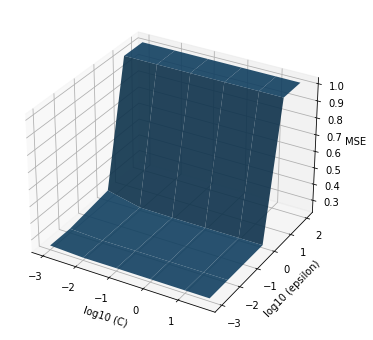

In [6]:
linear_mean_test_mse = linear_df['mean_test_mean_squared_error'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_mse, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

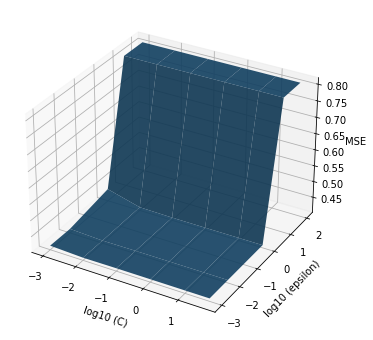

In [7]:
linear_mean_test_mae = linear_df['mean_test_mean_absolute_error'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_mae, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

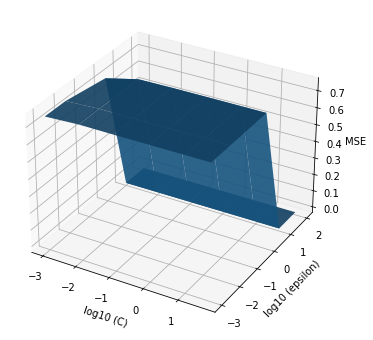

In [8]:
linear_mean_test_r2 = linear_df['mean_test_r2'].to_numpy().reshape((6,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(linear_C), 
                np.log10(linear_epsilon), 
                linear_mean_test_r2, 
                rstride=1, 
                cstride=1,
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

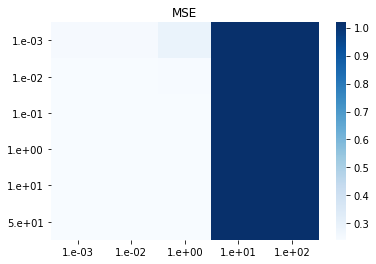

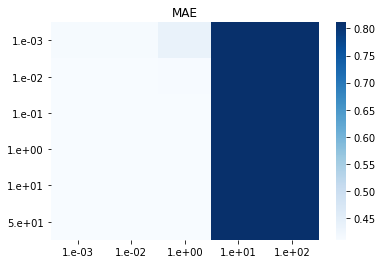

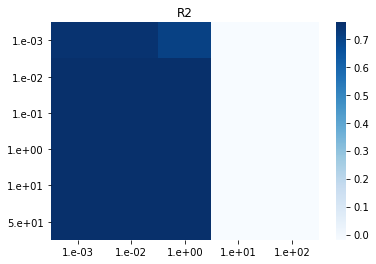

In [9]:
plt.title("MSE")
sns.heatmap(linear_mean_test_mse, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

plt.title("MAE")
sns.heatmap(linear_mean_test_mae, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

plt.title("R2")
sns.heatmap(linear_mean_test_r2, 
            cmap=cm.Blues, 
            xticklabels=['1.e-03', '1.e-02', '1.e+00', '1.e+01', '1.e+02'],
            yticklabels=['1.e-03', '1.e-02', '1.e-01', '1.e+00', '1.e+01', '5.e+01'])
plt.show()

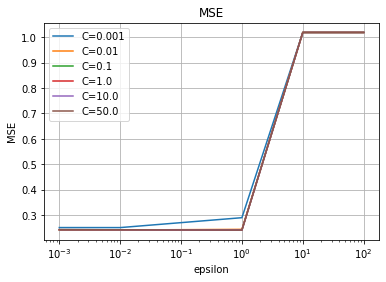

In [16]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_squared_error'], label=f"C={name}")

plt.title("MSE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.ylabel('MSE')
plt.grid()
plt.legend()
plt.savefig('linear-mse.pdf')
plt.show()


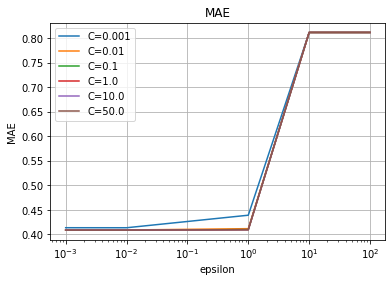

In [17]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_train_mean_absolute_error'], label=f"C={name}")

plt.title('MAE')
plt.xscale('log')
plt.ylabel('MAE')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.savefig('linear-mae.pdf')  
plt.show()


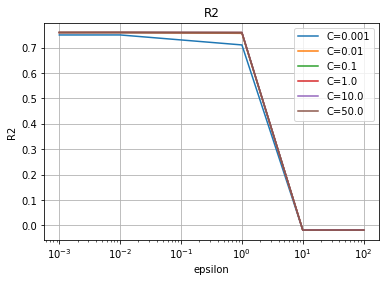

In [18]:
for name in linear_df.param_C.unique():
    rows=linear_df[linear_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_train_r2'], label=f"C={name}")

plt.title('R2')
plt.xscale('log')
plt.ylabel('R2')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.savefig('linear-r2.pdf')
plt.show()

In [19]:
linear_df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_kernel,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,...,std_train_neg_mean_squared_error,mean_test_r2,std_test_r2,rank_test_r2,mean_train_r2,std_train_r2,mean_test_mean_absolute_error,mean_train_mean_absolute_error,mean_test_mean_squared_error,mean_train_mean_squared_error
0,0,2.783055,0.024664,0.122811,0.000925,0.001,0.001,linear,-0.414277,0.004818,...,0.001715,0.748761,0.004434,17,0.749336,0.003164,0.414277,0.413696,0.251197,0.250643
1,1,2.728661,0.027628,0.123027,0.002879,0.001,0.010,linear,-0.414224,0.004814,...,0.001677,0.748850,0.004411,16,0.749449,0.003152,0.414224,0.413643,0.251108,0.250530
2,2,0.132290,0.006785,0.008055,0.000120,0.001,1.000,linear,-0.439250,0.004805,...,0.000876,0.709898,0.003075,18,0.710158,0.002443,0.439250,0.439149,0.290034,0.289825
3,3,0.002550,0.000235,0.001368,0.000110,0.001,10.000,linear,-0.811331,0.013643,...,0.006050,-0.018839,0.002597,19,-0.018775,0.000918,0.811331,0.811313,1.018798,1.018767
4,4,0.002497,0.000076,0.001587,0.000432,0.001,100.000,linear,-0.811331,0.013643,...,0.006050,-0.018839,0.002597,25,-0.018775,0.000918,0.811331,0.811313,1.018798,1.018767
5,5,2.918359,0.149192,0.128446,0.005762,0.010,0.001,linear,-0.409727,0.003819,...,0.001168,0.758100,0.005665,6,0.758957,0.002407,0.409727,0.409032,0.241783,0.241028
6,6,2.735575,0.060142,0.128866,0.008321,0.010,0.010,linear,-0.409681,0.003769,...,0.001159,0.758247,0.005652,4,0.759001,0.002314,0.409681,0.409044,0.241632,0.240985
7,7,0.025129,0.005558,0.002138,0.000060,0.010,1.000,linear,-0.411779,0.002965,...,0.000735,0.755637,0.006516,15,0.755735,0.001546,0.411779,0.411805,0.244196,0.244255
8,8,0.002340,0.000080,0.001680,0.000818,0.010,10.000,linear,-0.811331,0.013643,...,0.006050,-0.018839,0.002597,19,-0.018775,0.000918,0.811331,0.811313,1.018798,1.018767
9,9,0.002303,0.000017,0.001272,0.000023,0.010,100.000,linear,-0.811331,0.013643,...,0.006050,-0.018839,0.002597,25,-0.018775,0.000918,0.811331,0.811313,1.018798,1.018767


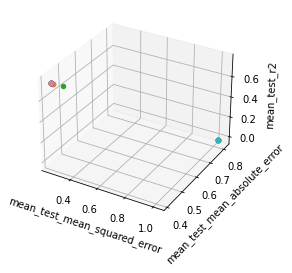

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for index, row in linear_df.iterrows():
    ax.scatter(row["mean_test_mean_squared_error"], row["mean_test_mean_absolute_error"], row["mean_test_r2"])

ax.set_xlabel('mean_test_mean_squared_error')
ax.set_ylabel('mean_test_mean_absolute_error')
ax.set_zlabel('mean_test_r2')

plt.show()

In [31]:
sigm_df = load_and_prune_dataframe(f"{path_prefix}/poly.csv")

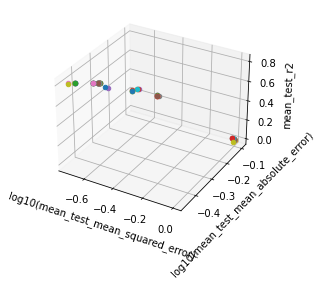

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for index, row in sigm_df.iterrows():
    if row["mean_test_r2"] > 0:
        ax.scatter(np.log10(row["mean_test_mean_squared_error"]), np.log10(row["mean_test_mean_absolute_error"]), row["mean_test_r2"])

ax.set_xlabel('log10(mean_test_mean_squared_error)')
ax.set_ylabel('log10(mean_test_mean_absolute_error)')
ax.set_zlabel('mean_test_r2')

plt.show()

## Import rbf results

In [18]:
rbf_df = load_and_prune_dataframe(f"{path_prefix}/rbf.csv")

KeyError: 'mean_test_neg_mean_absolute_error'

In [13]:
rbf_C = rbf_df['param_C'].to_numpy().reshape((5,5))
rbf_epsilon = rbf_df['param_epsilon'].to_numpy().reshape((5,5))

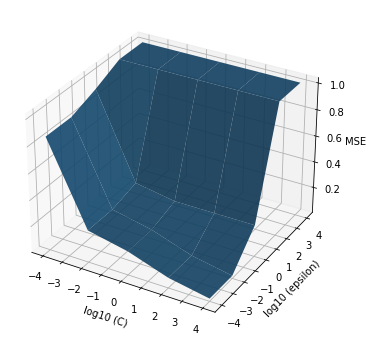

In [14]:
rbf_mean_test_mse = rbf_df['mean_test_mean_squared_error'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_mse, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

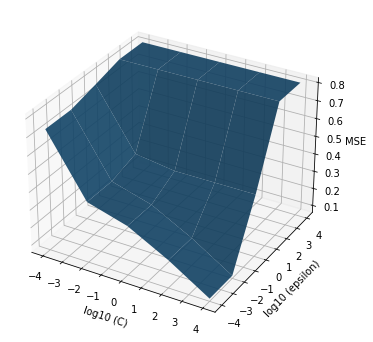

In [15]:
rbf_mean_test_mae = rbf_df['mean_test_mean_absolute_error'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_mae, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')
plt.show()

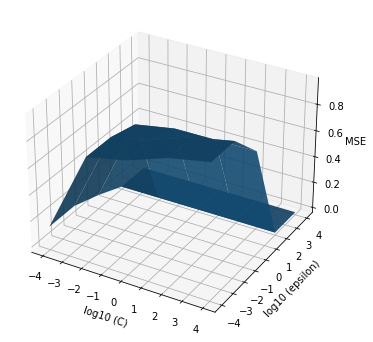

In [16]:
rbf_mean_test_r2 = rbf_df['mean_test_r2'].to_numpy().reshape((5,5))

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rbf_C), 
                np.log10(rbf_epsilon), 
                rbf_mean_test_r2, 
                rstride=1, 
                cstride=1, 
                alpha=0.9)

ax.set_xlabel('log10 (C)')
ax.set_ylabel('log10 (epsilon)')
ax.set_zlabel('MSE')

plt.show()

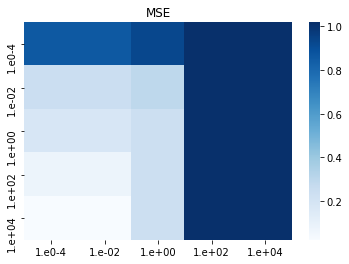

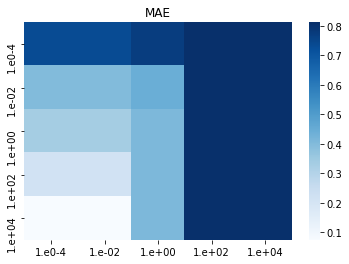

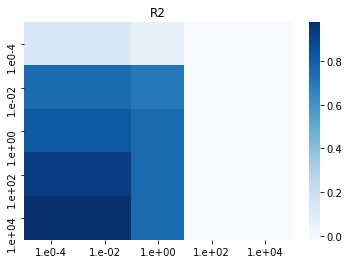

In [17]:
plt.title("MSE")
sns.heatmap(rbf_mean_test_mse, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

plt.title("MAE")
sns.heatmap(rbf_mean_test_mae, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

plt.title("R2")
sns.heatmap(rbf_mean_test_r2, 
            cmap=cm.Blues, 
            xticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'],
            yticklabels=['1.e0-4', '1.e-02', '1.e+00', '1.e+02', '1.e+04'])
plt.show()

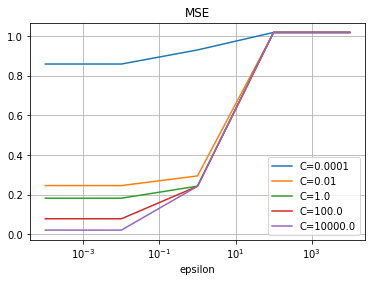

In [18]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_squared_error'], label=f"C={name}")

plt.title("MSE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

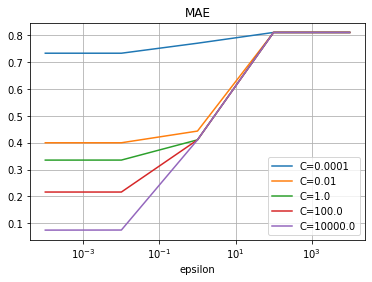

In [19]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_mean_absolute_error'], label=f"C={name}")

plt.title("MAE")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()

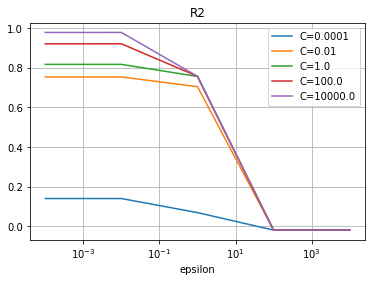

In [20]:
for name in rbf_df.param_C.unique():
    rows=rbf_df[rbf_df['param_C']==name]
    plt.plot(rows['param_epsilon'], rows['mean_test_r2'], label=f"C={name}")

plt.title("R2")
plt.xscale('log')
plt.xlabel('epsilon')
plt.grid()
plt.legend()
plt.show()